In [1]:
import os
os.chdir('..')

## Data Sampling

In [6]:
import pandas as pd
data = pd.read_csv('./data/data_balanced.csv')
print(data.shape)

(65046, 3)


In [5]:
data['interaction'].value_counts()

interaction
0    32523
1    32523
Name: count, dtype: int64

(65046, 3)


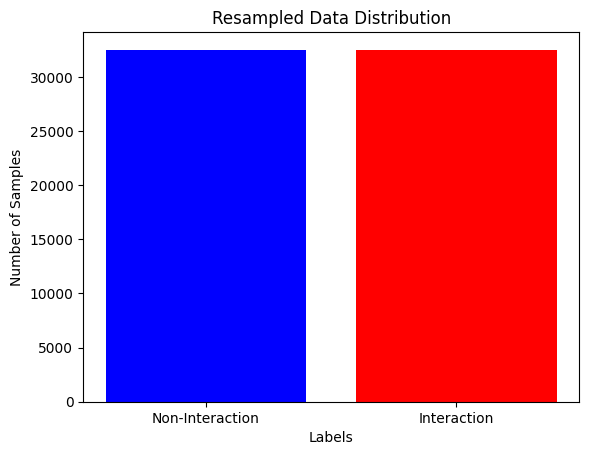

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('./data/data_balanced.csv')
print(data.shape)
# Assuming data['interaction'] contains the labels
label_counts = data['interaction'].value_counts()

# Extract labels and counts from the value_counts result
labels = label_counts.index.tolist()
counts = label_counts.values.tolist()
if len(labels) == 2:
    if labels[0] == 0:
        labels[0] = 'Non-Interaction'
    if labels[1] == 1:
        labels[1] = 'Interaction'
        
# Define colors for each bar
colors = ['blue', 'red']

plt.bar(labels, counts, color=colors)
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Resampled Data Distribution')
plt.show()

(130471, 3)


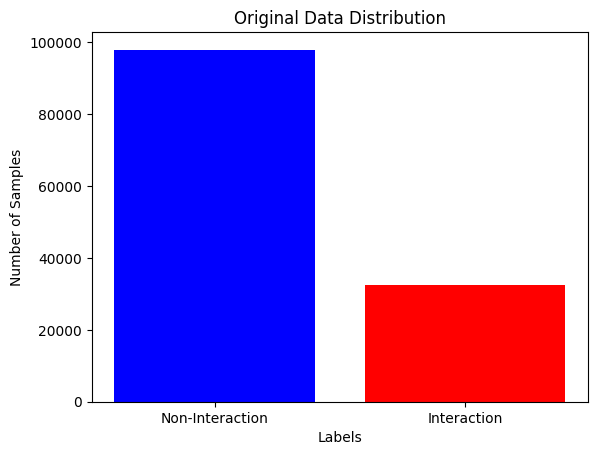

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('./data/data.csv')
print(data.shape)
# Assuming data['interaction'] contains the labels
label_counts = data['interaction'].value_counts()

# Extract labels and counts from the value_counts result
labels = label_counts.index.tolist()
counts = label_counts.values.tolist()
if len(labels) == 2:
    if labels[0] == 0:
        labels[0] = 'Non-Interaction'
    if labels[1] == 1:
        labels[1] = 'Interaction'
        
# Define colors for each bar
colors = ['blue', 'red']

plt.bar(labels, counts, color=colors)
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Original Data Distribution')
plt.show()

# Base Model

In [2]:
Error = [4.6590, 4.6449, 4.6394]
acc = [49.929, 50.072, 50.09]
AUC = [0.50, 0.50, 0.50]


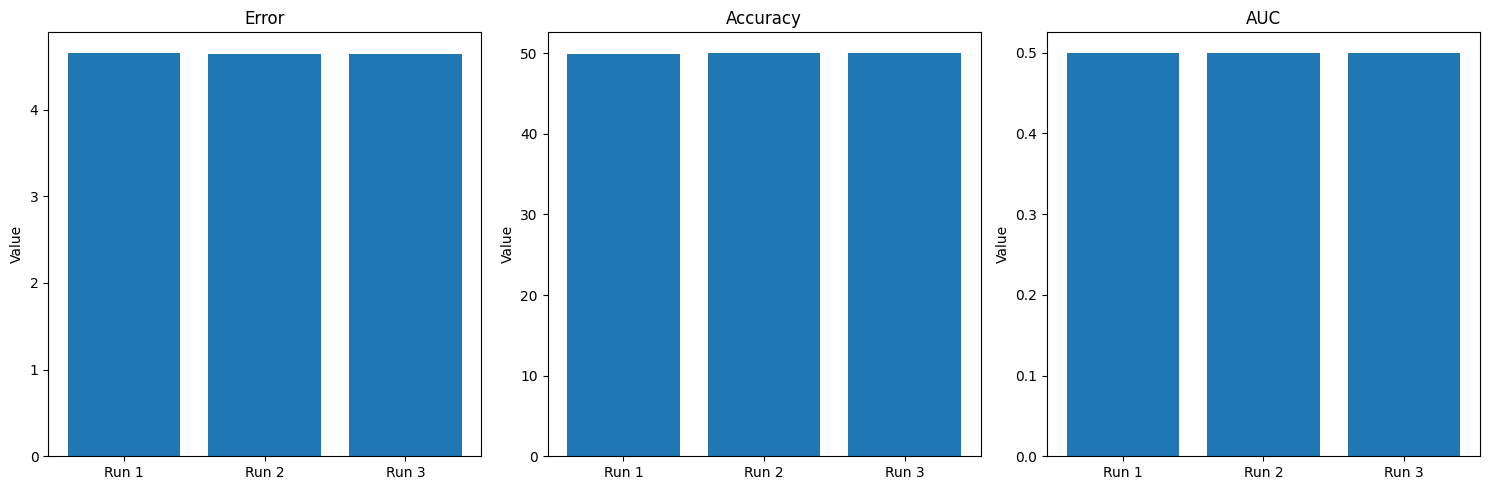

In [3]:

import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Subplot 1: Error
axs[0].bar(range(len(Error)), Error, tick_label=['Run 1', 'Run 2', 'Run 3'])
axs[0].set_title('Error')
axs[0].set_ylabel('Value')

# Subplot 2: Accuracy
axs[1].bar(range(len(acc)), acc, tick_label=['Run 1', 'Run 2', 'Run 3'])
axs[1].set_title('Accuracy')
axs[1].set_ylabel('Value')

# Subplot 3: AUC
axs[2].bar(range(len(AUC)), AUC, tick_label=['Run 1', 'Run 2', 'Run 3'])
axs[2].set_title('AUC')
axs[2].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

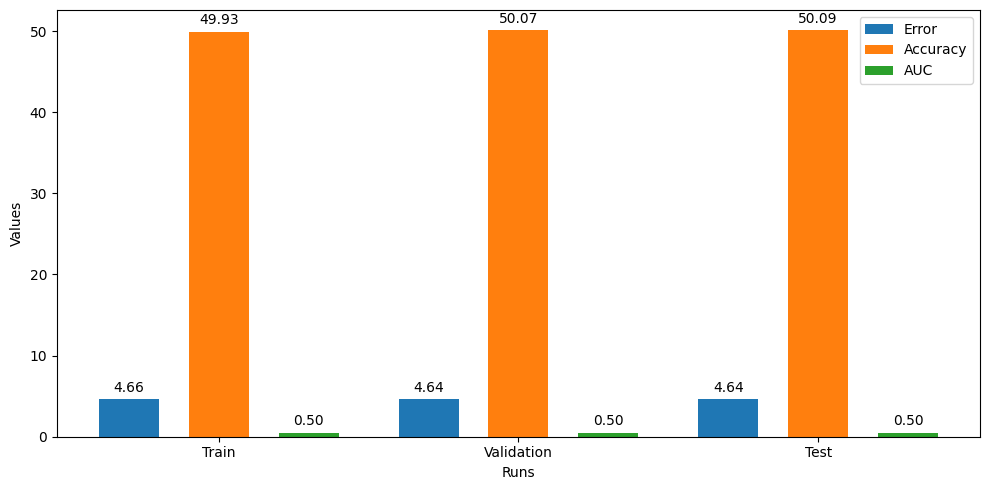

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
Error = [4.6590, 4.6449, 4.6394]
acc = [49.929, 50.072, 50.09]
AUC = [0.50, 0.50, 0.50]

# Create an array of indices for the x-axis
x = np.arange(len(Error))

# Width of each bar and spacing
bar_width = 0.2
spacing = 0.1

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot Error, Accuracy, and AUC as grouped bars with reduced spacing
error_bars = ax.bar(x - bar_width - spacing, Error, bar_width, label='Error')
acc_bars = ax.bar(x, acc, bar_width, label='Accuracy')
auc_bars = ax.bar(x + bar_width + spacing, AUC, bar_width, label='AUC')

# Set labels and title
ax.set_xlabel('Runs')
ax.set_ylabel('Values')
# ax.set_title('Error, Accuracy, and AUC for Runs')
ax.set_xticks(x)
ax.set_xticklabels(['Train', 'Validation', 'Test'])
ax.legend()

# Annotate the bars with their values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(error_bars)
annotate_bars(acc_bars)
annotate_bars(auc_bars)

# Show the plot
plt.tight_layout()
plt.show()


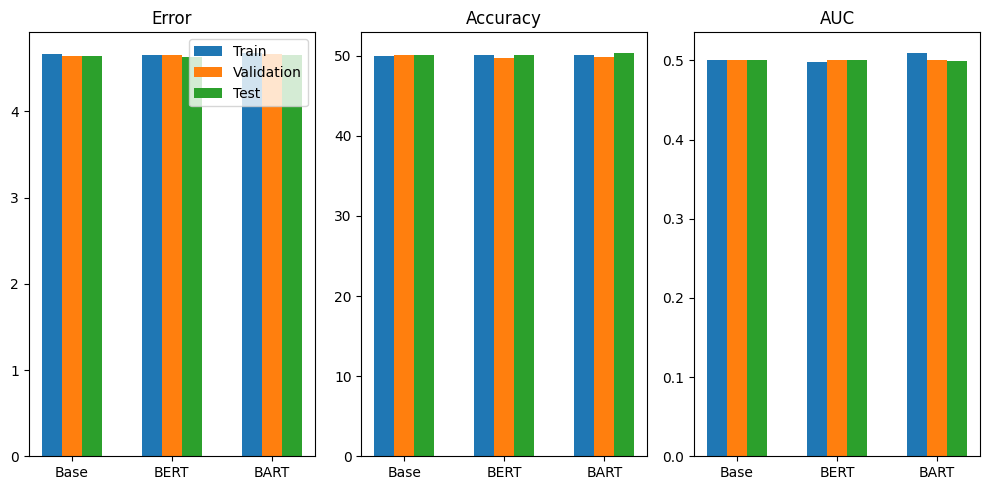

In [22]:
import matplotlib.pyplot as plt
import numpy as np

base = {'Train': {'Error': 4.6590, 'Accuracy': 49.929, 'AUC': 0.50},
        'Validation': {'Error': 4.6449, 'Accuracy': 50.072, 'AUC': 0.50},
        'Test': {'Error': 4.6394, 'Accuracy': 50.09, 'AUC': 0.50}}

bert = {'Train': {'Error': 4.6564, 'Accuracy': 50.098, 'AUC': 0.498},
        'Validation': {'Error': 4.6569, 'Accuracy': 49.738, 'AUC': 0.50},
        'Test': {'Error': 4.6322, 'Accuracy': 50.09, 'AUC': 0.50}}  

bart = {'Train': {'Error': 4.681, 'Accuracy': 50.09, 'AUC': 0.51},
        'Validation': {'Error': 4.6674, 'Accuracy': 49.773, 'AUC': 0.501},
        'Test': {'Error': 4.6511, 'Accuracy': 50.383, 'AUC': 0.499}}


# Extract the values for each metric and dataset
metrics = ['Error', 'Accuracy', 'AUC']
datasets = ['Train', 'Validation', 'Test']

data_dicts = [base, bert, bart]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Set the width of each bar
bar_width = 0.2
index = np.arange(len(data_dicts))

for i, metric in enumerate(metrics):
    for j, dataset in enumerate(datasets):
        values = [data[dataset][metric] for data in data_dicts]
        axs[i].bar(index + j * bar_width, values, bar_width, label=dataset)
        axs[i].set_title(metric)
        axs[i].set_xticks(index + bar_width)
        axs[i].set_xticklabels(['Base', 'BERT', 'BART'])

# Add legend
axs[0].legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()
